In [1]:
!pip install rudalle==1.1.3

  Using cached rudalle-1.1.3-py3-none-any.whl (40 kB)
  Using cached PyWavelets-1.1.1-cp310-cp310-linux_x86_64.whl
  Using cached transformers-4.10.3-py3-none-any.whl (2.8 MB)
  Using cached taming_transformers-0.0.1-py3-none-any.whl (45 kB)
  Using cached segmentation_models_pytorch-0.1.3-py3-none-any.whl (66 kB)
  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Using cached einops-0.3.2-py3-none-any.whl (25 kB)
  Using cached more_itertools-8.12.0-py3-none-any.whl (54 kB)
  Using cached torchvision-0.14.1-cp310-cp310-manylinux1_x86_64.whl (24.2 MB)
  Using cached opencv_python-4.5.4.60-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.3 MB)
  Using cached matplotlib-3.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Using cached youtokentome-1.0.6-cp310-cp310-linux_x86_64.whl
  Using cached numpy-1.24.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.

In [13]:
from rudalle import get_rudalle_model, get_tokenizer, get_vae
from rudalle.pipelines import generate_images, show
from rudalle.utils import seed_everything

In [14]:
device = 'cpu'
tokenizer = get_tokenizer()
dalle = get_rudalle_model('Malevich', pretrained=True, fp16=False, device=device)

tokenizer --> ready


Init model layer by layer: 100%|██████████| 398/398 [04:10<00:00,  1.59it/s]


◼️ Malevich is 1.3 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.


In [16]:
realesrgan = get_realesrgan('x4', device=device)
vae = get_vae().to(device)


x4 --> ready
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.
vae --> ready


## generation by ruDALLE

In [17]:
text = 'сова в цветных носках на песке'
pil_images = []
scores = []

seed_everything(42)

for top_k, top_p, images_num in [
    #(2048, 0.995, 3),
    #(1536, 0.99, 3),
    #(1024, 0.99, 3),
    #(1024, 0.98, 3),
    #(512, 0.97, 3),
    #(384, 0.96, 3),
    #(256, 0.95, 3),
    #(128, 0.95, 3),
    (1024, 0.9, 1),
]:
    _pil_images, _scores = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=images_num, top_p=top_p)
    pil_images += _pil_images
    scores += _scores

  4%|▍         | 45/1024 [00:26<09:03,  1.80it/s]

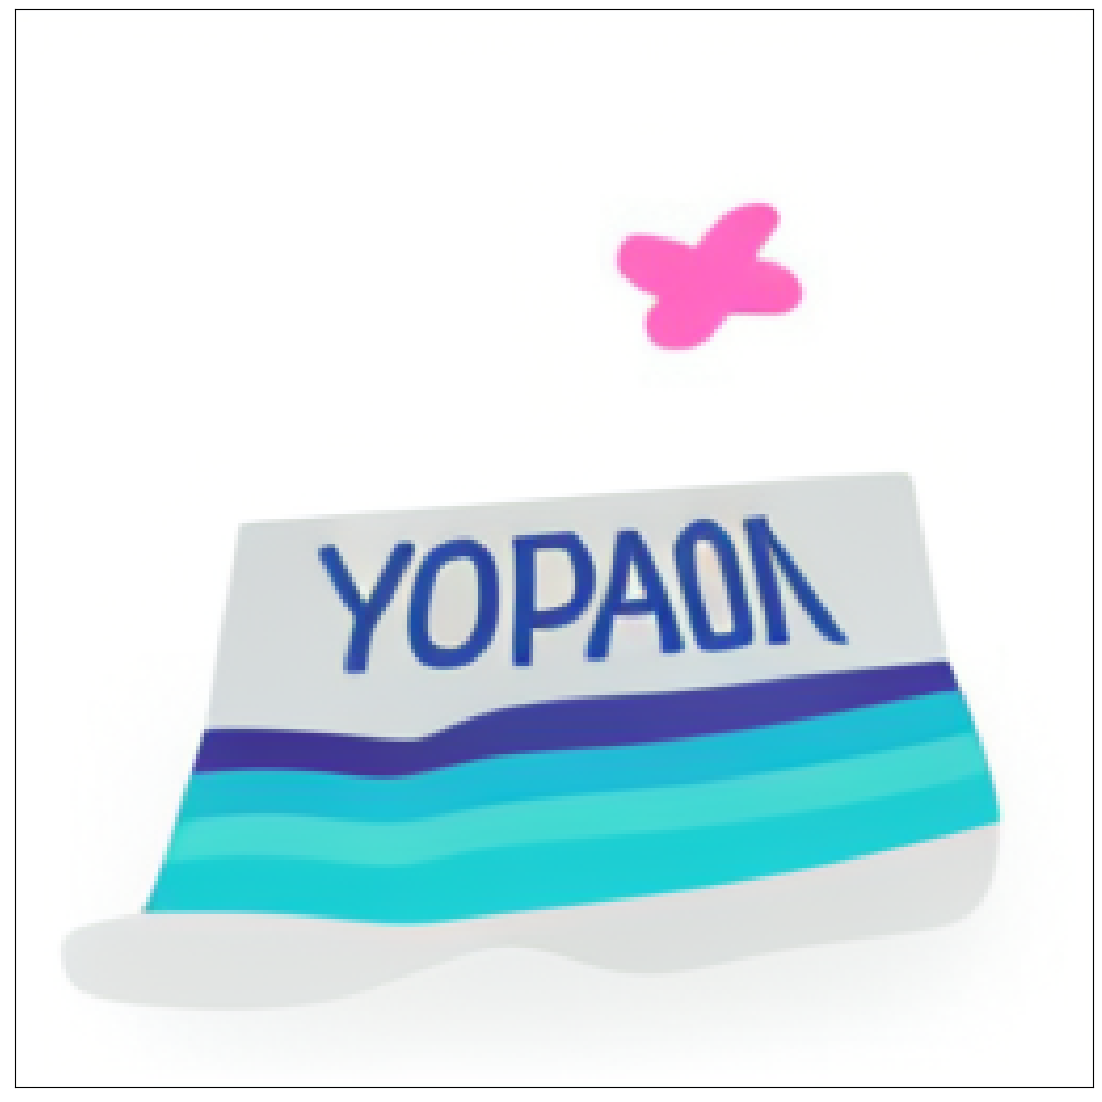

In [6]:
show([pil_image for pil_image, score in sorted(zip(pil_images, scores), key=lambda x: -x[1])] , 6)

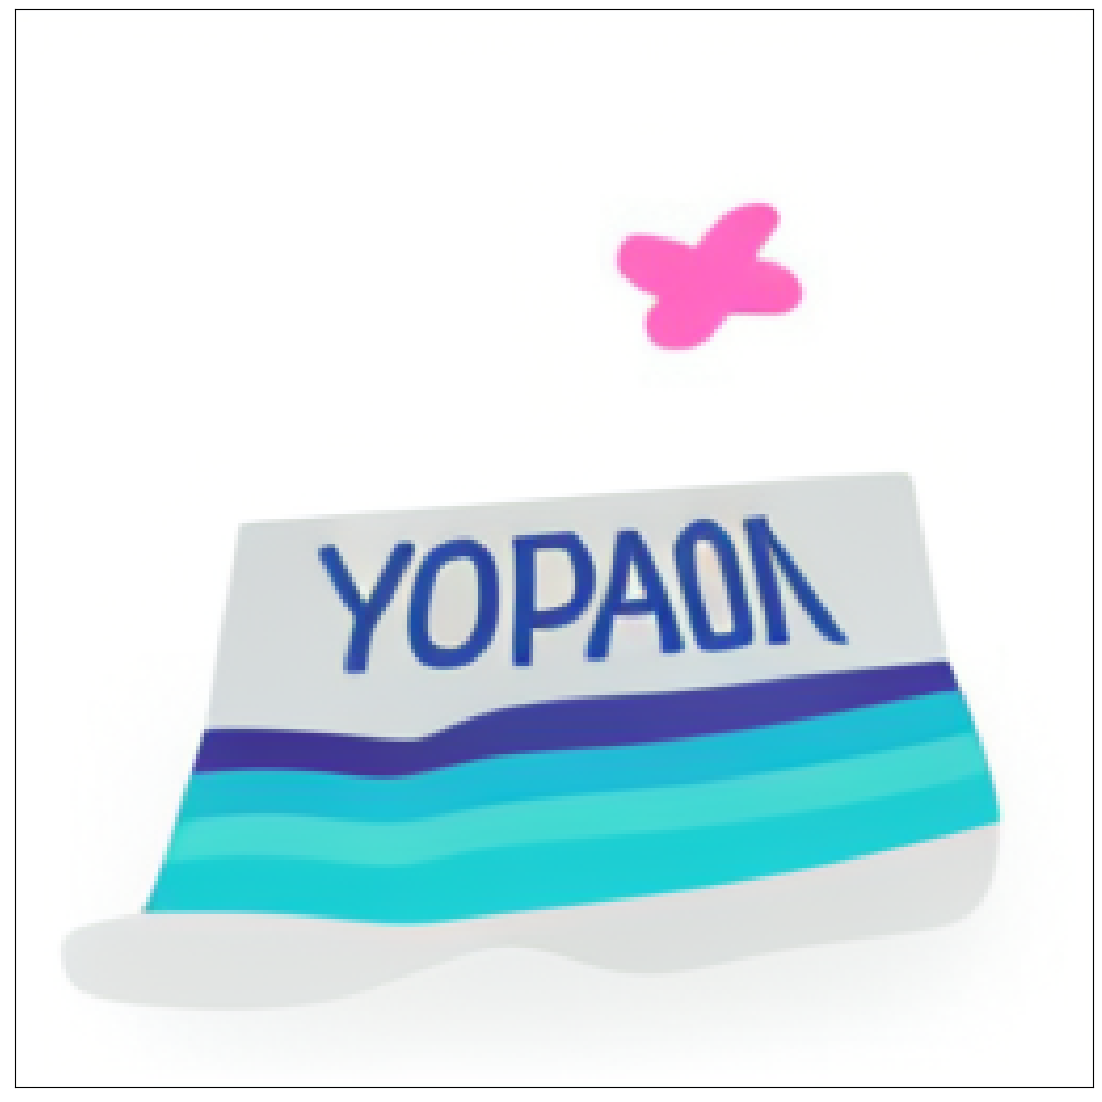

In [7]:
top_images, clip_scores = cherry_pick_by_clip(pil_images, text, ruclip, ruclip_processor, device=device, count=6)
show(top_images, 3)

In [8]:
sr_images = super_resolution(top_images, realesrgan)
show(sr_images, 3)

KeyboardInterrupt: 